# Import Dependencies

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Request Library and API key 
import requests 
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create Random Latitudes and Longitudes to Get Cities 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Determine Cities using Citipy 

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
# Citipy searches the nearest city to the coordinates, with a minimum population of 500. 
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count >= 625
print(f"{len(cities)} unique cities identified from 1,500 randomly generated coordinates.")

628 unique cities identified from 1,500 randomly generated coordinates.


# Retrieve Data Using Cities Generated 

In [9]:
# Build Basic URL for API call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Initialize Empty List and Counters for Data Retrieval 

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        # Gets reset to 1 once 50 cities have been processed 
        record_count = 1
        # Prevents time-out errors since OpenWeatherMap API only allows 50 retrievals per min for Free 
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. Enumerates the total number of cities processed. 
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | santa cruz de la palma
Processing Record 10 of Set 1 | barbar
City not found. Skipping...
Processing Record 11 of Set 1 | kilindoni
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | rio claro
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | miraflores
Processin

Processing Record 41 of Set 4 | yeppoon
Processing Record 42 of Set 4 | marsa matruh
Processing Record 43 of Set 4 | cervo
Processing Record 44 of Set 4 | ballina
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | itarema
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | rundu
Processing Record 50 of Set 4 | alice springs
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | salinopolis
Processing Record 5 of Set 5 | bandar-e lengeh
Processing Record 6 of Set 5 | san andres
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | puerto escondido
Processing Record 9 of Set 5 | ambilobe
Processing Record 10 of Set 5 | dinar
Processing Record 11 of Set 5 | san cristobal

Processing Record 25 of Set 8 | mbandaka
Processing Record 26 of Set 8 | carnarvon
Processing Record 27 of Set 8 | mount isa
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | srednekolymsk
Processing Record 30 of Set 8 | tres arroyos
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 33 of Set 8 | afsin
Processing Record 34 of Set 8 | dingle
Processing Record 35 of Set 8 | henties bay
Processing Record 36 of Set 8 | leinefelde
Processing Record 37 of Set 8 | jumla
Processing Record 38 of Set 8 | evanton
Processing Record 39 of Set 8 | kaihua
Processing Record 40 of Set 8 | khonuu
City not found. Skipping...
Processing Record 41 of Set 8 | madang
Processing Record 42 of Set 8 | mikuni
Processing Record 43 of Set 8 | oranjestad
Processing Record 44 of Set 8 | morant bay
Processing Record 45 of Set 8 | northam
Processing Record 46 of Set 8 | port-de-paix
City not found. Skipping...
Processing 

Processing Record 14 of Set 12 | flinders
Processing Record 15 of Set 12 | sansepolcro
Processing Record 16 of Set 12 | komsomolskiy
Processing Record 17 of Set 12 | trindade
Processing Record 18 of Set 12 | penarth
Processing Record 19 of Set 12 | coffs harbour
Processing Record 20 of Set 12 | iskateley
Processing Record 21 of Set 12 | cerritos
Processing Record 22 of Set 12 | labuan
Processing Record 23 of Set 12 | jalu
Processing Record 24 of Set 12 | prieska
Processing Record 25 of Set 12 | tsumeb
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 28 of Set 12 | nadym
Processing Record 29 of Set 12 | verkhoyansk
Processing Record 30 of Set 12 | souillac
Processing Record 31 of Set 12 | daru
Processing Record 32 of Set 12 | chernyy yar
Processing Record 33 of Set 12 | ketchikan
Processing Record 34 of Set 12 | zhangjiakou
Processing Record 35 of Set 12 | esmeraldas
Processing Record 36 of Set 12 | g

In [11]:
# Check the length of the cities_data dictionary 
print(f"Weather data for {len(city_data)} cities were retrieved from OpenWeatherMap API")

Weather data for 580 cities were retrieved from OpenWeatherMap API


# Convert the data into a Dataframe 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
raw_city_data_df = pd.DataFrame(city_data)
raw_city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,81.27,76,100,6.62,PG,2022-03-23 17:47:50
1,Sao Filipe,14.8961,-24.4956,71.74,71,1,10.02,CV,2022-03-23 17:47:51
2,Albany,42.6001,-73.9662,44.38,40,100,1.99,US,2022-03-23 17:45:06
3,Fort Nelson,58.8053,-122.7002,18.99,86,100,4.61,CA,2022-03-23 17:47:51
4,Mahebourg,-20.4081,57.7000,80.89,78,20,6.91,MU,2022-03-23 17:47:52
5,Rikitea,-23.1203,-134.9692,79.95,71,70,17.11,PF,2022-03-23 17:44:43
6,Port Lincoln,-34.7333,135.8667,59.11,73,26,8.68,AU,2022-03-23 17:47:52
7,Santa Cruz De La Palma,28.6835,-17.7642,67.14,63,40,21.85,ES,2022-03-23 17:47:53
8,Kilindoni,-7.9139,39.6668,82.67,77,76,9.98,TZ,2022-03-23 17:47:53
9,Hithadhoo,-0.6000,73.0833,83.80,67,5,15.12,MV,2022-03-23 17:47:54


In [13]:
new_column_order = ["City", 
                    "Country", 
                    "Date", 
                    "Lat", 
                    "Lng", 
                    "Max Temp", 
                    "Humidity", 
                    "Cloudiness", 
                    "Wind Speed"]

city_data_df = raw_city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2022-03-23 17:47:50,-2.0226,147.2712,81.27,76,100,6.62
1,Sao Filipe,CV,2022-03-23 17:47:51,14.8961,-24.4956,71.74,71,1,10.02
2,Albany,US,2022-03-23 17:45:06,42.6001,-73.9662,44.38,40,100,1.99
3,Fort Nelson,CA,2022-03-23 17:47:51,58.8053,-122.7002,18.99,86,100,4.61
4,Mahebourg,MU,2022-03-23 17:47:52,-20.4081,57.7000,80.89,78,20,6.91
5,Rikitea,PF,2022-03-23 17:44:43,-23.1203,-134.9692,79.95,71,70,17.11
6,Port Lincoln,AU,2022-03-23 17:47:52,-34.7333,135.8667,59.11,73,26,8.68
7,Santa Cruz De La Palma,ES,2022-03-23 17:47:53,28.6835,-17.7642,67.14,63,40,21.85
8,Kilindoni,TZ,2022-03-23 17:47:53,-7.9139,39.6668,82.67,77,76,9.98
9,Hithadhoo,MV,2022-03-23 17:47:54,-0.6000,73.0833,83.80,67,5,15.12


# Convert the DataFrame into a CSV Output File 

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Creating Scatter Plots of Latitude against Weather Parameters

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Magic function for plots and style change to bypass transparent background image upon save 
%matplotlib inline 
from matplotlib import style

## Latitude vs. Max Temperature 

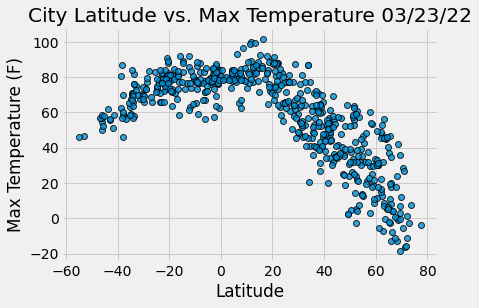

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs. Humidity

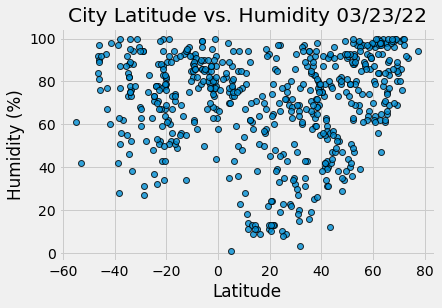

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs. Cloudiness 

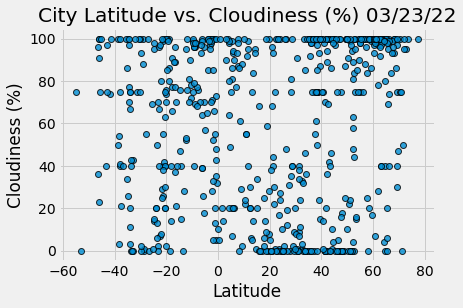

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs. Windspeed 

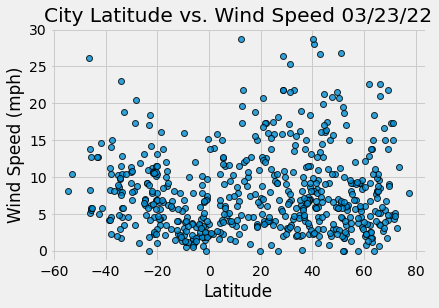

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Regression Analysis of Variables with Latitudes

## Define Linear Regression Function

In [89]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, rtext_coordinates, figno):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Get the R-squared value and the other values 
    r2 = (f"R-sqrd = {round((r_value**2), 2)}")
    r = round(r_value, 2)
    # p = round(p_value,5)
    ste = round(std_err, 2)
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r2, rtext_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # Use the graph style fivethirtyeight.
    style.use('fivethirtyeight')
    plt.show()
    # Save the figure.
    plt.savefig(f"weather_data/Fig{figno}.png")
    
    # Display the R, p and standard error 
    print(f"R={r}\n"
    f"p={p_value}\n"
    f"standard error={ste}")

## Divide Data by Hemispheres (Northern: lat>=0) and (Southern: lat<0)

In [90]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
print(f"Northern Hemisphere has {len(northern_hemi_df)} cities.")
print(f"Southern Hemisphere has {len(southern_hemi_df)} cities.")

Northern Hemisphere has 381 cities.
Southern Hemisphere has 199 cities.


## Max Temperature 

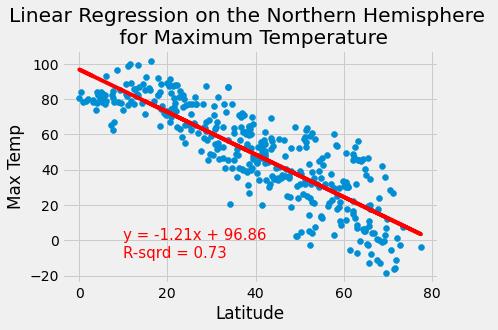

R=-0.86
p=2.5543579996150404e-110
standard error=0.04


<Figure size 432x288 with 0 Axes>

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (10,0),
                       (10,-10),
                       5)

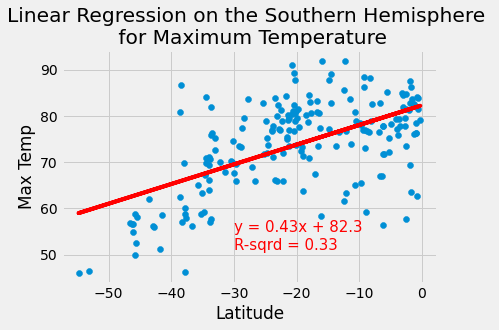

R=0.58
p=5.565605243823331e-19
standard error=0.04


<Figure size 432x288 with 0 Axes>

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,55), (-30,51), 6)

## Humidity 

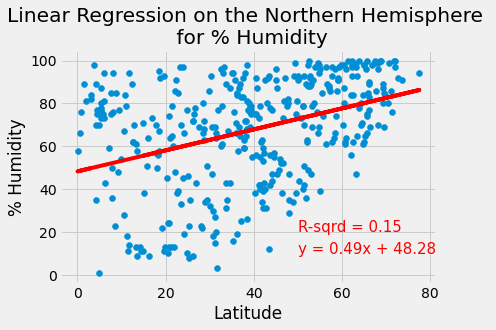

R=0.38
p=1.2954734680635504e-14
standard error=0.06


<Figure size 432x288 with 0 Axes>

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(50,10),(50,20), 7)

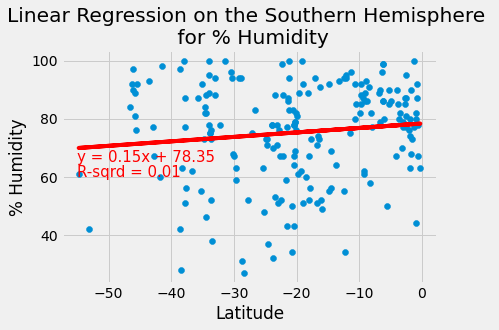

R=0.12
p=0.09334986382122579
standard error=0.09


<Figure size 432x288 with 0 Axes>

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55, 65), (-55,60), 8)

## Cloudiness 

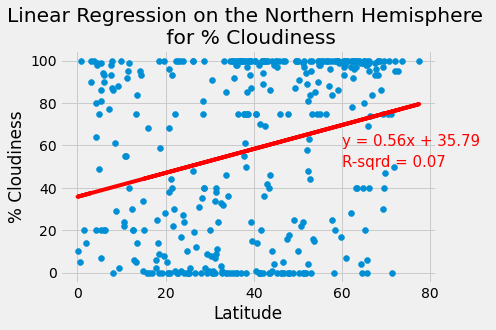

R=0.27
p=9.491789720112301e-08
standard error=0.1


<Figure size 432x288 with 0 Axes>

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,60),(60,50), 9)

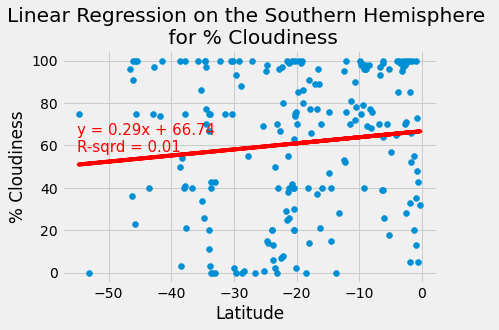

R=0.11
p=0.11418453853931308
standard error=0.18


<Figure size 432x288 with 0 Axes>

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55, 65), (-55,57), 10)

## Windspeed

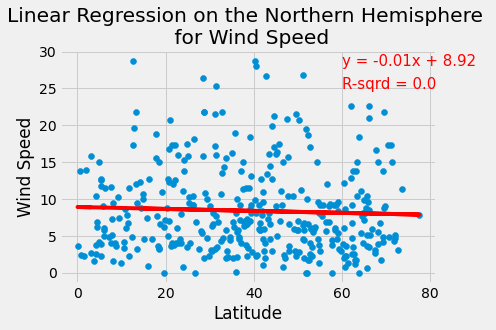

R=-0.04
p=0.39101343038596614
standard error=0.02


<Figure size 432x288 with 0 Axes>

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(60,28), (60,25), 11)

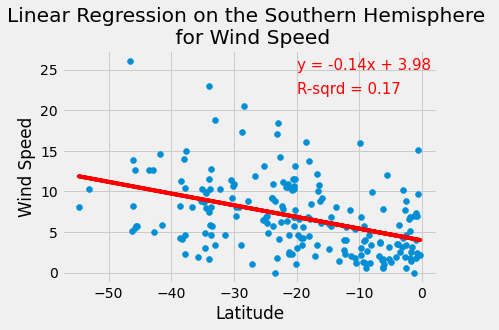

R=-0.42
p=1.0013806093512732e-09
standard error=0.02


<Figure size 432x288 with 0 Axes>

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-20,25), (-20,22), 12)